Con los datos transformados y depurados, Procederemos a hacer un análisis exploratorio de datos (EDA), centrado en las diversas columnas presentes en nuestros conjuntos de datos. El objetivo principal es identificar métricas clave y valores atípicos que arrojen luz sobre patrones, tendencias y factores destacados en los datos.

Durante este proceso, nos enfocaremos en la generación de gráficos que nos permitan entender mejor la distribución de los datos y las posibles relaciones entre las variables.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
Y_ulta_beauty = pd.read_csv('..\datasets\csv\Y_ulta_beauty.csv')
G_ulta_beauty = pd.read_csv('..\datasets\csv\G_ulta_bauty.csv')
G_ulta_beauty.drop('Unnamed: 0', axis=1, inplace=True)

Y_ulta_beauty

In [17]:
Y_ulta_beauty['year'].describe()

count    2032.000000
mean     2017.009350
std         2.487074
min      2007.000000
25%      2015.000000
50%      2017.000000
75%      2019.000000
max      2022.000000
Name: year, dtype: float64

In [4]:
Y_ulta_beauty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      2032 non-null   object 
 1   business_id  2032 non-null   object 
 2   stars        2032 non-null   float64
 3   text         2032 non-null   object 
 4   year         2032 non-null   int64  
 5   state        2032 non-null   object 
 6   latitude     2032 non-null   float64
 7   longitude    2032 non-null   float64
 8   source       2032 non-null   object 
 9   month        2032 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 158.9+ KB


In [5]:
Y_ulta_beauty.head()

,user_id,business_id,stars,text,year,state,latitude,longitude,source,month
0,dKN5pfsZYMyNXw6QekuYrg,idP674ti6a8yg8z2xFcCgA,1.0,I recently bought $50 worth of hair products I...,2017,AZ,39.987189,-75.403201,Y,9
1,OxPwTirxr6jsthULWBAuZg,idP674ti6a8yg8z2xFcCgA,1.0,Based on other reviews I see I am not the only...,2018,AZ,39.987189,-75.403201,Y,6
2,nAURZM3uxMR1pVpKIav-Iw,idP674ti6a8yg8z2xFcCgA,1.0,I specifically came to this store because it w...,2017,AZ,39.987189,-75.403201,Y,1
3,qYsHVItNC1_WnJGBIx5kXA,idP674ti6a8yg8z2xFcCgA,5.0,Received a great haircut from Jess.\r\n\r\nI n...,2017,AZ,39.987189,-75.403201,Y,2
4,JpE6JdtbkOqXUElu2q28Og,idP674ti6a8yg8z2xFcCgA,1.0,Agree with the other reviews that are unhappy ...,2018,AZ,39.987189,-75.403201,Y,3


In [6]:
Y_ulta_beauty.tail()

,user_id,business_id,stars,text,year,state,latitude,longitude,source,month
2027,DcLBRHzmHpAlbN1i8mvItg,u_bN8-vC8D7MvkI8RakP4Q,1.0,I don't think I have ever wanted to spend mone...,2019,CA,28.203467,-82.667816,Y,8
2028,QT9e4KJSkhgtcoYKpnzpQw,u_bN8-vC8D7MvkI8RakP4Q,1.0,They have the most horrible stylist ever. I ha...,2021,CA,28.203467,-82.667816,Y,9
2029,azmpOk9aG8y_oA4_cVhc8Q,u_bN8-vC8D7MvkI8RakP4Q,5.0,"I was lucky enough to go to Ulta in Trinity, w...",2021,CA,28.203467,-82.667816,Y,9
2030,i48cHEyRBl5g9_npYIG7dA,u_bN8-vC8D7MvkI8RakP4Q,5.0,"I love ulta beauty store, they literally sell ...",2019,CA,28.203467,-82.667816,Y,9
2031,cws9eoXHkTFY9ZzlFnx_mQ,u_bN8-vC8D7MvkI8RakP4Q,1.0,This place is literally a JOKE! I did a in sto...,2019,CA,28.203467,-82.667816,Y,11


Chequeamos nulos

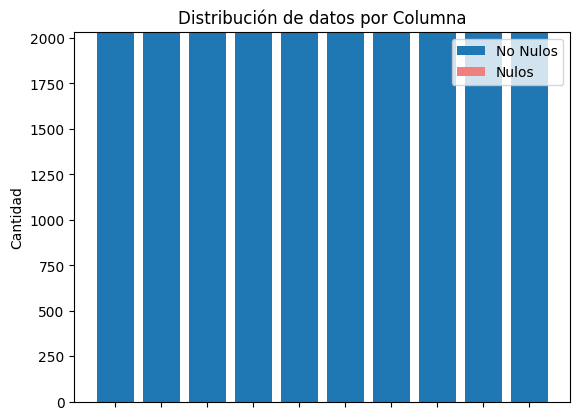

In [7]:
# Inicializar listas para almacenar los valores nulos y no nulos
valores_nulos = []
valores_no_nulos = []

# Iterar sobre las columnas del DataFrame
for columna in Y_ulta_beauty.columns:
    valores_nulos.append(Y_ulta_beauty[columna].isnull().sum())
    valores_no_nulos.append(Y_ulta_beauty[columna].count())

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots()

# Barra de valores no nulos
ax.bar(Y_ulta_beauty.columns, valores_no_nulos, label='No Nulos')

# Barra de valores nulos apilada encima
ax.bar(Y_ulta_beauty.columns, valores_nulos, bottom=valores_no_nulos, label='Nulos',color='lightcoral')

# Configurar leyenda y etiquetas
ax.legend()
ax.set_ylabel('Cantidad')
ax.set_title('Distribución de datos por Columna')
ax.set_xticklabels([])

# Mostrar el gráfico
plt.show()

In [8]:
Y_ulta_beauty.isna().sum()

user_id        0
business_id    0
stars          0
text           0
year           0
state          0
latitude       0
longitude      0
source         0
month          0
dtype: int64

Correlacion entre columnas numericas

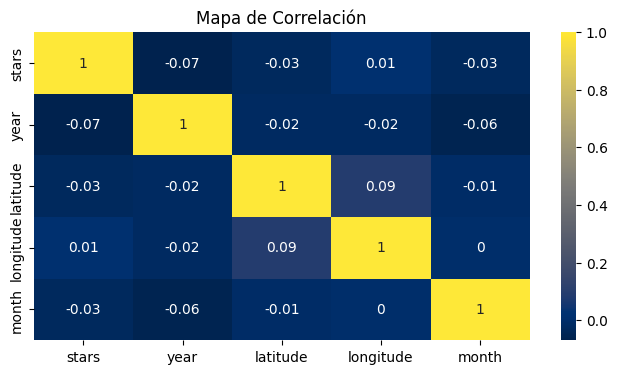

In [9]:
# Generamos un mapa con las correlaciones
dataNumerica = Y_ulta_beauty.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap="cividis", annot=True)
plt.title('Mapa de Correlación')
plt.show()

Podemos ver que las correlaciones son negativas o casi tendiendo a 0 lo cual indica que no tienen correlacion directa entre si

Histogramas para Variables Numéricas:

Distribucion de calificaciones

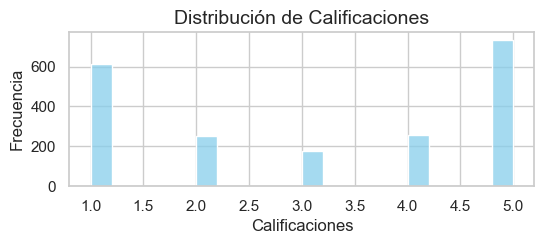

In [12]:
# Configuramos el estilo de Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(6, 2))
# Creamos el histograma
sns.histplot(Y_ulta_beauty['stars'], bins=20, kde=False, color='skyblue')
# Personalizamos el gráfico
plt.title('Distribución de Calificaciones', fontsize=14)
plt.xlabel('Calificaciones', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
# Mostramos el gráfico
plt.show()

Distribucion de los años

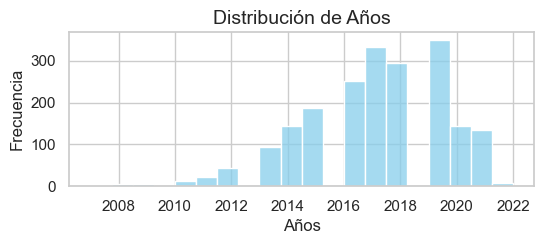

In [13]:
# Configuramos el estilo de Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(6, 2))
# Creamos el histograma
sns.histplot(Y_ulta_beauty['year'], bins=20, kde=False, color='skyblue')
# Personalizamos el gráfico
plt.title('Distribución de Años', fontsize=14)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
# Mostramos el gráfico
plt.show()

Relacion entre las calificaciones y años

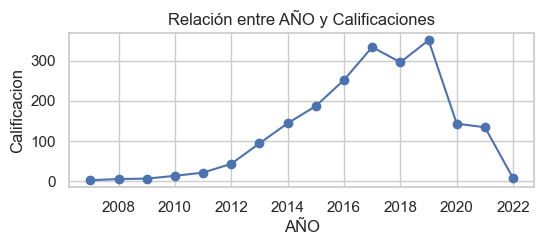

In [15]:
# Agrupar los datos por fecha y suma el número de víctimas en cada fecha
victimas_por_fecha = Y_ulta_beauty.groupby('year')['stars'].count().reset_index()

# Creamos la gráfica
plt.figure(figsize=(6, 2))
plt.plot(victimas_por_fecha['year'], victimas_por_fecha['stars'], marker='o', linestyle='-')
plt.title('Relación entre AÑO y Calificaciones')
plt.xlabel('AÑO')
plt.ylabel('Calificacion')
plt.grid(True)
plt.show()

Mes

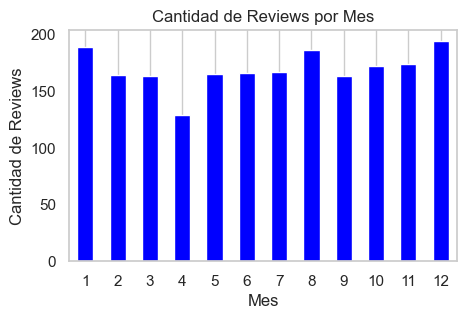

In [26]:
plt.figure(figsize=(5, 3))
Y_ulta_beauty.groupby('month')['stars'].count().plot(kind='bar', color='blue')
plt.title('Cantidad de Reviews por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Chequeamos outliers

In [27]:
Y_ulta_beauty.columns

Index(['user_id', 'business_id', 'stars', 'text', 'year', 'state', 'latitude',
       'longitude', 'source', 'month'],
      dtype='object')

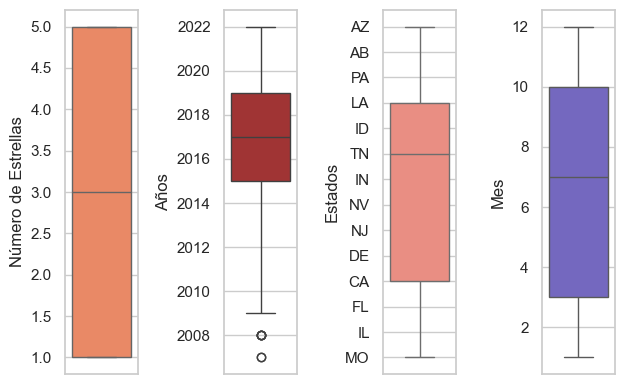

In [29]:
# Ajustamos el tamaño de la figura
plt.figure(figsize=(8, 4))

# Subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=Y_ulta_beauty, y='stars', color = "#FF7F50")
plt.ylabel('Número de Estrellas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=Y_ulta_beauty, y='year', color = "#B22222")
plt.ylabel('Años')

plt.subplot(1, 5, 3) 
sns.boxplot(data=Y_ulta_beauty, y='state', color = "#FA8072")
plt.ylabel('Estados')

plt.subplot(1, 5, 4) 
sns.boxplot(data=Y_ulta_beauty, y='month', color = "#6A5ACD")
plt.ylabel('Mes')

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()

-------------------------------------------------------------------------

G_ulta_beauty

In [19]:
G_ulta_beauty['year'].describe()

count    17188.000000
mean      2018.990691
std          1.153049
min       2011.000000
25%       2018.000000
50%       2019.000000
75%       2020.000000
max       2021.000000
Name: year, dtype: float64

In [35]:
G_ulta_beauty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17188 entries, 0 to 17187
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      17188 non-null  float64
 1   business_id  17188 non-null  object 
 2   stars        17188 non-null  int64  
 3   text         8575 non-null   object 
 4   year         17188 non-null  int64  
 5   state        17188 non-null  object 
 6   latitude     17188 non-null  float64
 7   longitude    17188 non-null  float64
 8   source       17188 non-null  object 
 9   month        17188 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.3+ MB


In [33]:
G_ulta_beauty.head()

,user_id,business_id,stars,text,year,state,latitude,longitude,source,month
0,1.118232e+20,0x88892218e9cd6499:0x421281dcaf386e1d,5,Both budget priced and high quality cosmetics ...,2017,AL,33.375896,-86.817683,G,5
1,1.042629e+20,0x88892218e9cd6499:0x421281dcaf386e1d,3,"SOMER IS THE BEST STYLIST THEY HAVE, OTHER STY...",2017,AL,33.375896,-86.817683,G,9
2,1.043726e+20,0x88892218e9cd6499:0x421281dcaf386e1d,5,Very helpful staff. Everyone seemed knowledge...,2017,AL,33.375896,-86.817683,G,2
3,1.143917e+20,0x88892218e9cd6499:0x421281dcaf386e1d,5,Fantastic selection and great staff,2017,AL,33.375896,-86.817683,G,3
4,1.090261e+20,0x88892218e9cd6499:0x421281dcaf386e1d,5,Great products!,2016,AL,33.375896,-86.817683,G,12


In [37]:
G_ulta_beauty.tail()

,user_id,business_id,stars,text,year,state,latitude,longitude,source,month
17183,1.120971e+20,0x533495e641aa6e71:0xcb788f90b8c056ae,5,NaN,2021,WY,44.274553,-105.498059,G,2
17184,1.099145e+20,0x533495e641aa6e71:0xcb788f90b8c056ae,5,NaN,2020,WY,44.274553,-105.498059,G,9
17185,1.000163e+20,0x533495e641aa6e71:0xcb788f90b8c056ae,5,NaN,2021,WY,44.274553,-105.498059,G,6
17186,1.128856e+20,0x533495e641aa6e71:0xcb788f90b8c056ae,5,NaN,2021,WY,44.274553,-105.498059,G,6
17187,1.044666e+20,0x533495e641aa6e71:0xcb788f90b8c056ae,5,NaN,2021,WY,44.274553,-105.498059,G,2


In [3]:
'''ulta_beauty = pd.concat([Y_ulta_beauty, G_ulta_beauty])'''

Estandarizamos el business_id para evitar que se dupliquen en las bases de google y yelp ya que en cada fuente de informacion el id es distinto